Let $X = \rho(UA)$ for Haar-random $U$ and let $Y = \|Av\|$ for surface area random $v \in S^{n-1}$. 

Let $Y' = \|Av\|$ where $v$ is a top eigenvector of Haar random $UA$.

If $X \succcurlyeq Y' \succcurlyeq Y$, then $X \succcurlyeq Y$ where $A\succcurlyeq B$ means $A$ (first or second order) stochastically dominates $B$. Second order domination is enough to conclude that the inequalities of averages is true. 

By construction, $X \succcurlyeq Y'$, (this is the "integrate by montecarlo" coupling).

So it remains to be seen whether $Y' \succcurlyeq Y$ in the first order or maybe only in second order.

To see experimentally if this is true, generate 10000 UA, put all $10000$ **top** eigenvectors in set $H$, then check if the CDF of $Y' = \text{set of } \|Av\| \forall v \in H$ dominates $Y = \text{set of } \|Av\| \forall v \in S^{n-1}$


In [197]:
import numpy as np
from scipy.stats import ortho_group, unitary_group
import matplotlib.pyplot as plt
import pandas as pd

In [199]:
def random_S_n(n):
    x = np.random.normal(0,1,(1,n))[0]
    return x / np.linalg.norm(x)

def random_complex_S_n(n):
    z = random_S_n(2*n)
    z_prime = []
    for i in np.arange(0,2*n,2):
        z_prime.append(z[i]+z[i+1]*1j)
    return z_prime

def CDF(data, len_data = 10000):
    N = len(data)
    count, bins_count = np.histogram(data, bins=len_data)
    pdf = count / sum(count)
    cdf = np.cumsum(pdf)
    return [bins_count[1:],cdf]

# Over Unitary Group

In [200]:
A = np.diag([3,2,1/6])
n = len(A)
H = []
for i in range(100000):
    U = unitary_group.rvs(n)
    l , V = np.linalg.eig(U@A)
    max_idx = np.argmax(np.abs(l))
    H.append(V[:,max_idx])

In [201]:
dist_Y_prime = np.array([np.linalg.norm(A@h) for h in H])
dist_Y = np.array([np.linalg.norm(A@random_complex_S_n(n)) for h in H])

for complex $v$ in $S^{2n-1}$

Text(0.5, 1.0, 'CDF to see if 1st Order Dominance')

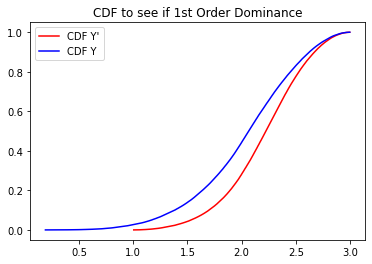

In [202]:
t1, CDF1 = CDF(dist_Y_prime)
t2, CDF2 = CDF(dist_Y)

plt.plot(t1, CDF1, label = "CDF Y'", color = "red")
plt.plot(t2, CDF2, label = "CDF Y", color = "blue")
plt.legend()
plt.title("CDF to see if 1st Order Dominance")

In [203]:
def lower_Riemann(values,CDF):
    H = []
    for i in range(1,len(values)):
        width = values[i]-values[i-1]
        x = CDF[i-1]*width
        H.append(x)
    return np.array(H)


def rolling_lower_Riemann(H):
    G = [0]
    for i in range(len(H)):
        G.append(np.sum(H[:i]))
    return G

In [204]:
sum(lower_Riemann(t1, CDF1))

0.7972671960947563

Text(0.5, 1.0, 'Rolling Integral CDF to see if 2nd Order Dominance')

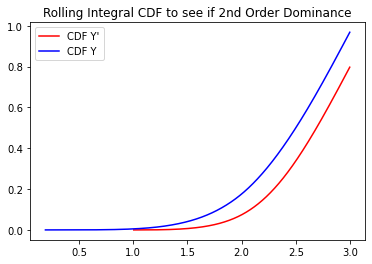

In [205]:
plt.plot(t1, rolling_lower_Riemann(lower_Riemann(t1, CDF1)), label = "CDF Y'", color = "red")
plt.plot(t2, rolling_lower_Riemann(lower_Riemann(t2, CDF2)), label = "CDF Y", color = "blue")
plt.legend()
plt.title("Rolling Integral CDF to see if 2nd Order Dominance")

# Over Orthogonal Group

In [206]:
A = np.diag([3,2,1/6])
n = len(A)
H = []
for i in range(100000):
    U = ortho_group.rvs(n)
    l , V = np.linalg.eig(U@A)
    max_idx = np.argmax(np.abs(l))
    H.append(V[:,max_idx])

In [207]:
dist_Y_prime = np.array([np.linalg.norm(A@h) for h in H])
dist_Y = np.array([np.linalg.norm(A@random_S_n(n)) for h in H])

Text(0.5, 1.0, 'CDF to see if 1st Order Dominance')

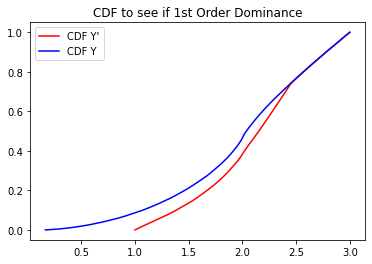

In [208]:
t1, CDF1 = CDF(dist_Y_prime)
t2, CDF2 = CDF(dist_Y)

plt.plot(t1, CDF1, label = "CDF Y'", color = "red")
plt.plot(t2, CDF2, label = "CDF Y", color = "blue")
plt.legend()
plt.title("CDF to see if 1st Order Dominance")

Text(0.5, 1.0, 'Rolling Integral CDF to see if 2nd Order Dominance')

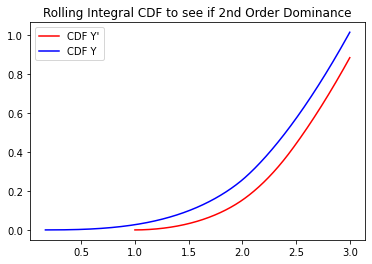

In [209]:
plt.plot(t1, rolling_lower_Riemann(lower_Riemann(t1, CDF1)), label = "CDF Y'", color = "red")
plt.plot(t2, rolling_lower_Riemann(lower_Riemann(t2, CDF2)), label = "CDF Y", color = "blue")
plt.legend()
plt.title("Rolling Integral CDF to see if 2nd Order Dominance")